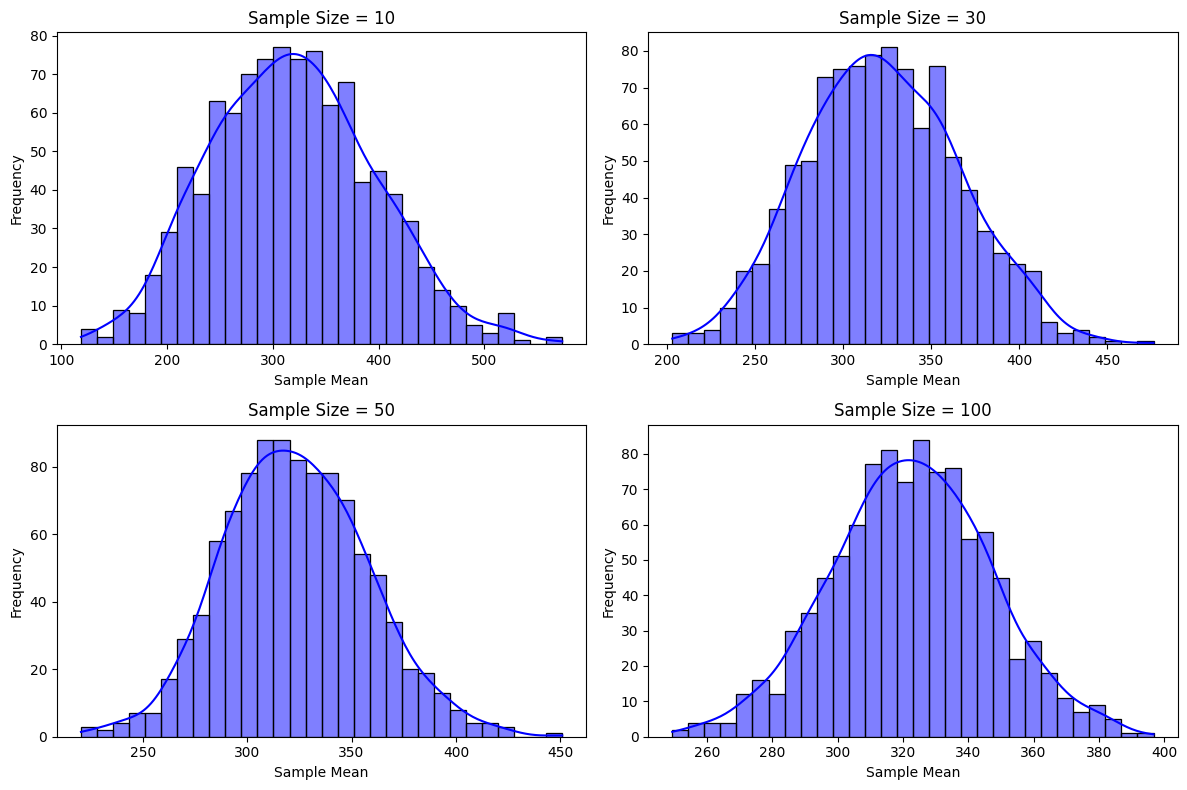

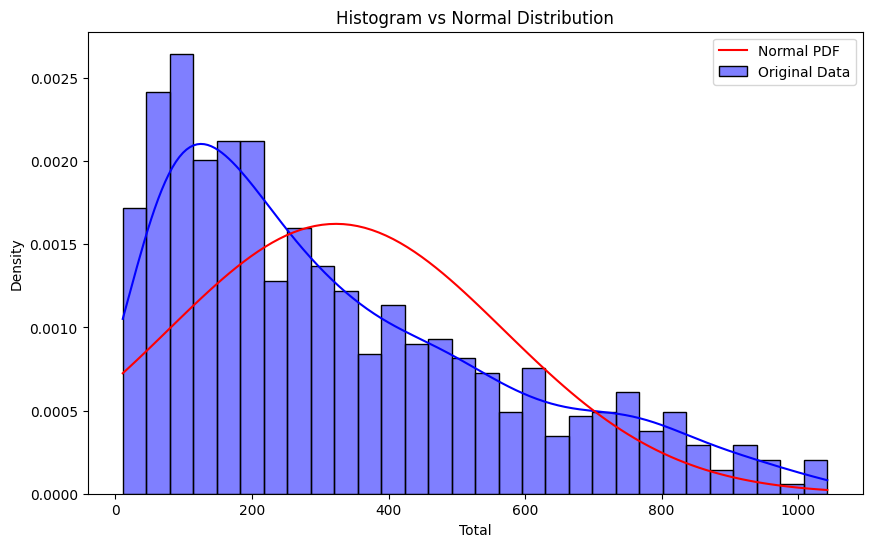

Mean: 322.97
Standard Deviation: 245.89


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load dataset
file_path = "/content/supermarket_sales -.csv"
df = pd.read_csv(file_path)

# Select numerical column (e.g., "Total" column)
column_name = "Total"  # Change this if needed
data = df[column_name].dropna()

# Compute mean and standard deviation
mean_val = np.mean(data)
std_val = np.std(data, ddof=1)

# Central Limit Theorem Demonstration
sample_sizes = [10, 30, 50, 100]
plt.figure(figsize=(12, 8))

for i, sample_size in enumerate(sample_sizes, 1):
    sample_means = [np.mean(np.random.choice(data, size=sample_size, replace=True)) for _ in range(1000)]

    plt.subplot(2, 2, i)
    sns.histplot(sample_means, kde=True, bins=30, color="blue")
    plt.title(f"Sample Size = {sample_size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot original data histogram and normal PDF
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, bins=30, color="blue", label="Original Data", stat="density")

# Plot Normal Distribution PDF
x = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x, mean_val, std_val)
plt.plot(x, pdf, color="red", label="Normal PDF")

plt.title("Histogram vs Normal Distribution")
plt.xlabel(column_name)
plt.ylabel("Density")
plt.legend()
plt.show()

# Print summary statistics
print(f"Mean: {mean_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")


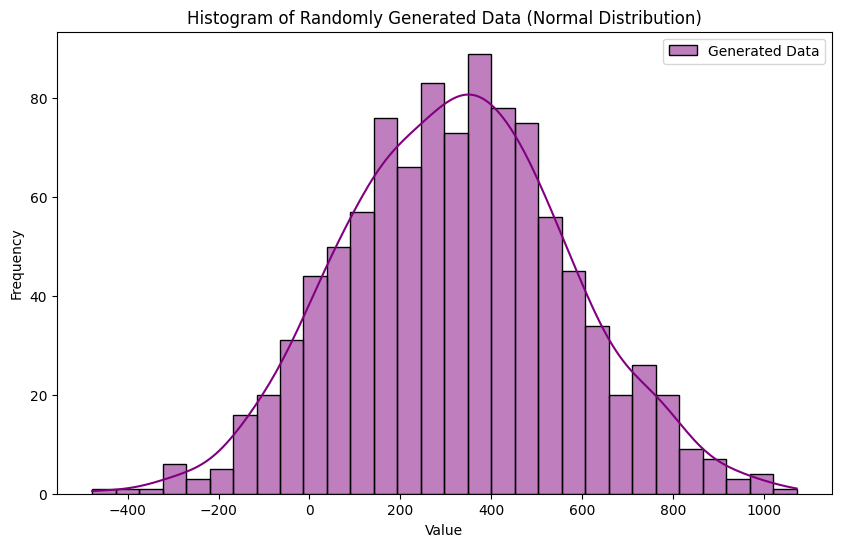

Probability that a randomly selected value is below the mean: 0.5000
95th Percentile of the Normal Distribution: 727.41


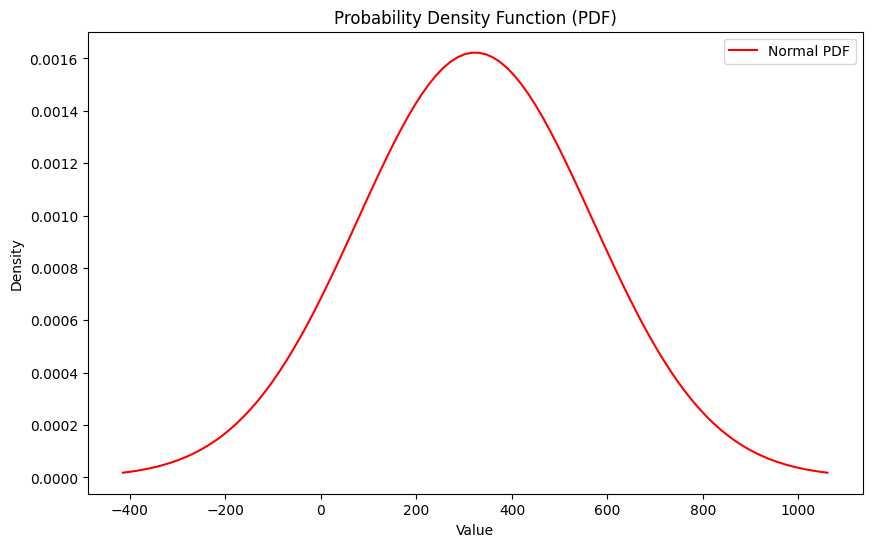

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Generate 1000 random numbers from a normal distribution
random_samples = np.random.normal(mean_val, std_val, 1000)

# Plot histogram of generated samples
plt.figure(figsize=(10, 6))
sns.histplot(random_samples, kde=True, bins=30, color="purple", label="Generated Data")
plt.title("Histogram of Randomly Generated Data (Normal Distribution)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Cumulative Probability (pnorm equivalent) - Probability of value < mean
cdf_value = norm.cdf(mean_val, mean_val, std_val)
print(f"Probability that a randomly selected value is below the mean: {cdf_value:.4f}")

# Quantiles (qnorm equivalent) - 95th percentile
percentile_95 = norm.ppf(0.95, mean_val, std_val)
print(f"95th Percentile of the Normal Distribution: {percentile_95:.2f}")

# Density Function (dnorm equivalent) - PDF for different values
x_values = np.linspace(mean_val - 3*std_val, mean_val + 3*std_val, 100)
pdf_values = norm.pdf(x_values, mean_val, std_val)

# Plot PDF
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, color="red", label="Normal PDF")
plt.title("Probability Density Function (PDF)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


Original Data Skewness: 0.89
Original Data Kurtosis: -0.09
Sample Size 10 - Skewness: 0.22, Kurtosis: -0.13
Sample Size 30 - Skewness: 0.15, Kurtosis: 0.03
Sample Size 50 - Skewness: 0.13, Kurtosis: -0.18
Sample Size 100 - Skewness: 0.12, Kurtosis: 0.23
Sample Size 200 - Skewness: 0.10, Kurtosis: -0.12


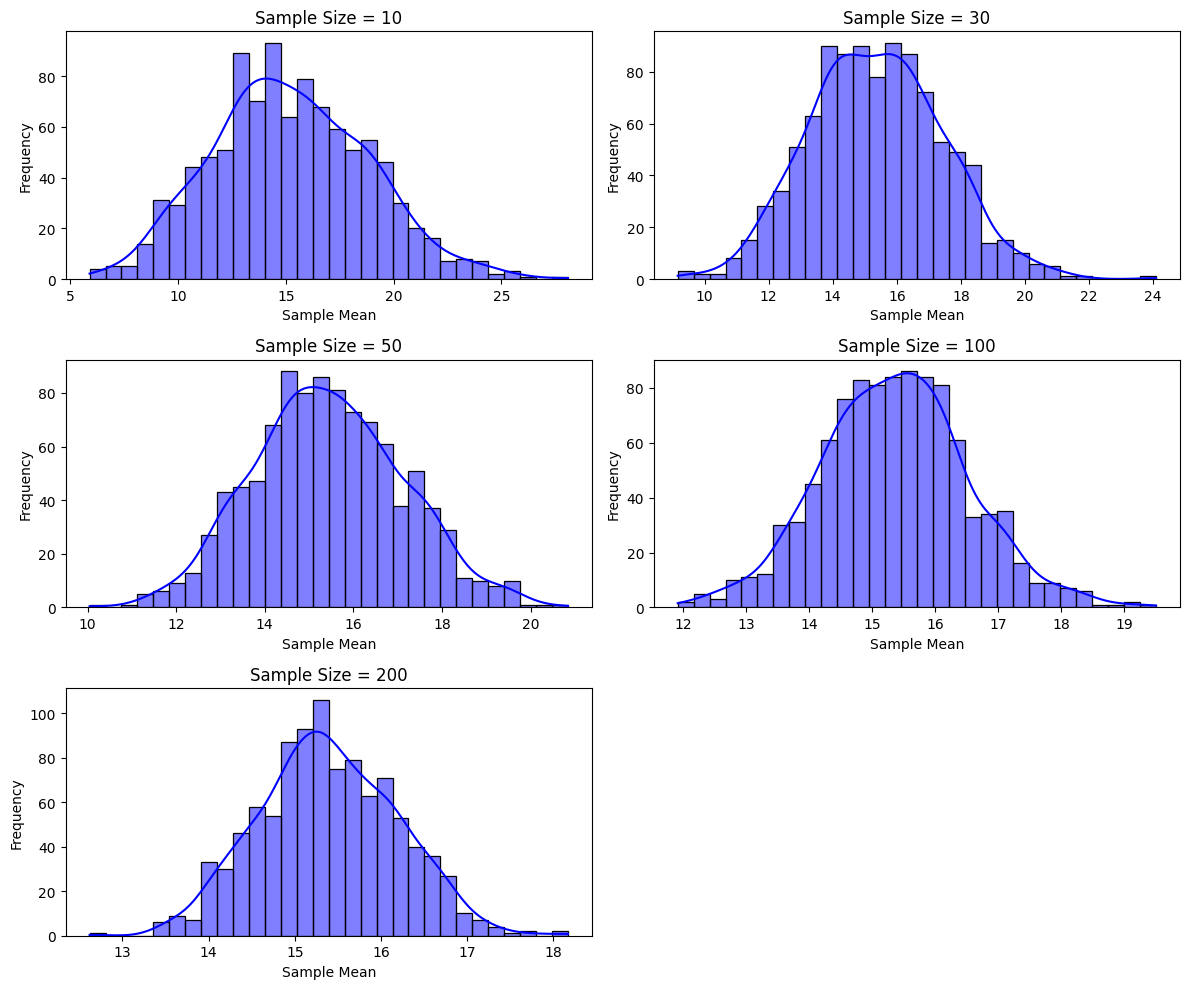

99th Percentile Value: 42.62


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

# Select a highly skewed numerical column (e.g., "Tax 5%" as an example)
column_name = "Tax 5%"  # Change this if needed
data = df[column_name].dropna()

# Compute skewness and kurtosis of the original data
orig_skewness = skew(data)
orig_kurtosis = kurtosis(data)

print(f"Original Data Skewness: {orig_skewness:.2f}")
print(f"Original Data Kurtosis: {orig_kurtosis:.2f}")

# Sample sizes for CLT verification
sample_sizes = [10, 30, 50, 100, 200]

plt.figure(figsize=(12, 10))

# Extract 1000 samples and compute sample means
for i, sample_size in enumerate(sample_sizes, 1):
    sample_means = [np.mean(np.random.choice(data, size=sample_size, replace=True)) for _ in range(1000)]

    # Compute skewness and kurtosis of sample means
    sample_skewness = skew(sample_means)
    sample_kurtosis = kurtosis(sample_means)

    print(f"Sample Size {sample_size} - Skewness: {sample_skewness:.2f}, Kurtosis: {sample_kurtosis:.2f}")

    plt.subplot(3, 2, i)
    sns.histplot(sample_means, kde=True, bins=30, color="blue")
    plt.title(f"Sample Size = {sample_size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Compute the 99th percentile value using the normal distribution
percentile_99 = norm.ppf(0.99, np.mean(data), np.std(data, ddof=1))
print(f"99th Percentile Value: {percentile_99:.2f}")
